In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# csv 파일 읽어오기
train = pd.read_csv('train_dust.csv')

In [3]:
# dust : 2557 row, 8 column
train.shape

(2557, 8)

In [4]:
# dust 첫 5행
train.head()

,Date,Temperature,W_speed,W_direction,Humidity,Tianjin,Weihai,Seoul
0,2014-01-01,4.0,3.7,12,51.3,3,3,3
1,2014-01-02,1.5,2.0,13,35.4,5,2,2
2,2014-01-03,2.3,2.5,2,54.4,3,2,2
3,2014-01-04,-0.1,2.4,12,47.1,2,1,2
4,2014-01-05,-0.8,1.9,12,48.4,3,2,1


In [5]:
# 각 column별 null 개수
train.isnull().sum()

Date           0
Temperature    0
W_speed        0
W_direction    0
Humidity       0
Tianjin        0
Weihai         0
Seoul          0
dtype: int64

In [6]:
# 각 column별 데이터 타입
train.dtypes

Date            object
Temperature    float64
W_speed        float64
W_direction      int64
Humidity       float64
Tianjin          int64
Weihai           int64
Seoul            int64
dtype: object

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'W_speed'}>,
        <AxesSubplot:title={'center':'W_direction'}>],
       [<AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Tianjin'}>,
        <AxesSubplot:title={'center':'Weihai'}>],
       [<AxesSubplot:title={'center':'Seoul'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

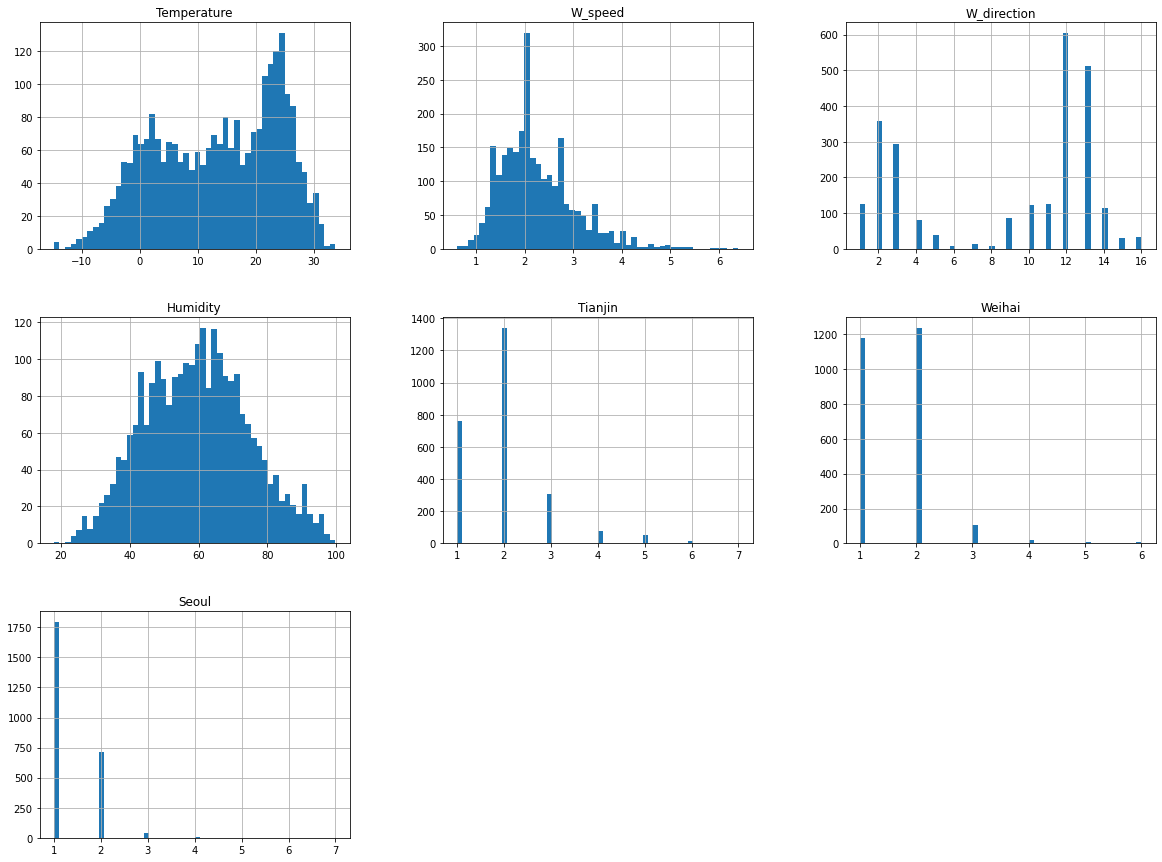

In [7]:
# 각 column별 히스토그램 출력
train.hist(bins=50, figsize=(20, 15)) # bins : 구간 경계값

(array([   0,    1,    2, ..., 2554, 2555, 2556]),
 [Text(0, 0, '2014-01-01'),
  Text(1, 0, '2014-01-02'),
  Text(2, 0, '2014-01-03'),
  Text(3, 0, '2014-01-04'),
  Text(4, 0, '2014-01-05'),
  Text(5, 0, '2014-01-06'),
  Text(6, 0, '2014-01-07'),
  Text(7, 0, '2014-01-08'),
  Text(8, 0, '2014-01-09'),
  Text(9, 0, '2014-01-10'),
  Text(10, 0, '2014-01-11'),
  Text(11, 0, '2014-01-12'),
  Text(12, 0, '2014-01-13'),
  Text(13, 0, '2014-01-14'),
  Text(14, 0, '2014-01-15'),
  Text(15, 0, '2014-01-16'),
  Text(16, 0, '2014-01-17'),
  Text(17, 0, '2014-01-18'),
  Text(18, 0, '2014-01-19'),
  Text(19, 0, '2014-01-20'),
  Text(20, 0, '2014-01-21'),
  Text(21, 0, '2014-01-22'),
  Text(22, 0, '2014-01-23'),
  Text(23, 0, '2014-01-24'),
  Text(24, 0, '2014-01-25'),
  Text(25, 0, '2014-01-26'),
  Text(26, 0, '2014-01-27'),
  Text(27, 0, '2014-01-28'),
  Text(28, 0, '2014-01-29'),
  Text(29, 0, '2014-01-30'),
  Text(30, 0, '2014-01-31'),
  Text(31, 0, '2014-02-01'),
  Text(32, 0, '2014-02-02'),
  

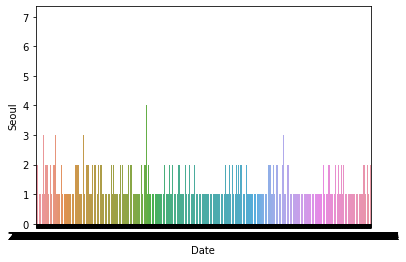

In [8]:
# 날짜별 미세먼지 평균 근황
graph1 = sns.barplot(x='Date', y='Seoul', data=train)
plt.xticks(rotation=0)

In [9]:
# 변수 별 상관관계
corr = train.corr()

In [10]:
# 서울 미세먼지를 기준으로 각 변수와의 상관관계
corr['Seoul'].sort_values(ascending=False)

Seoul          1.000000
Weihai         0.413547
Tianjin        0.311928
W_direction    0.092786
W_speed       -0.014112
Humidity      -0.108591
Temperature   -0.180054
Name: Seoul, dtype: float64

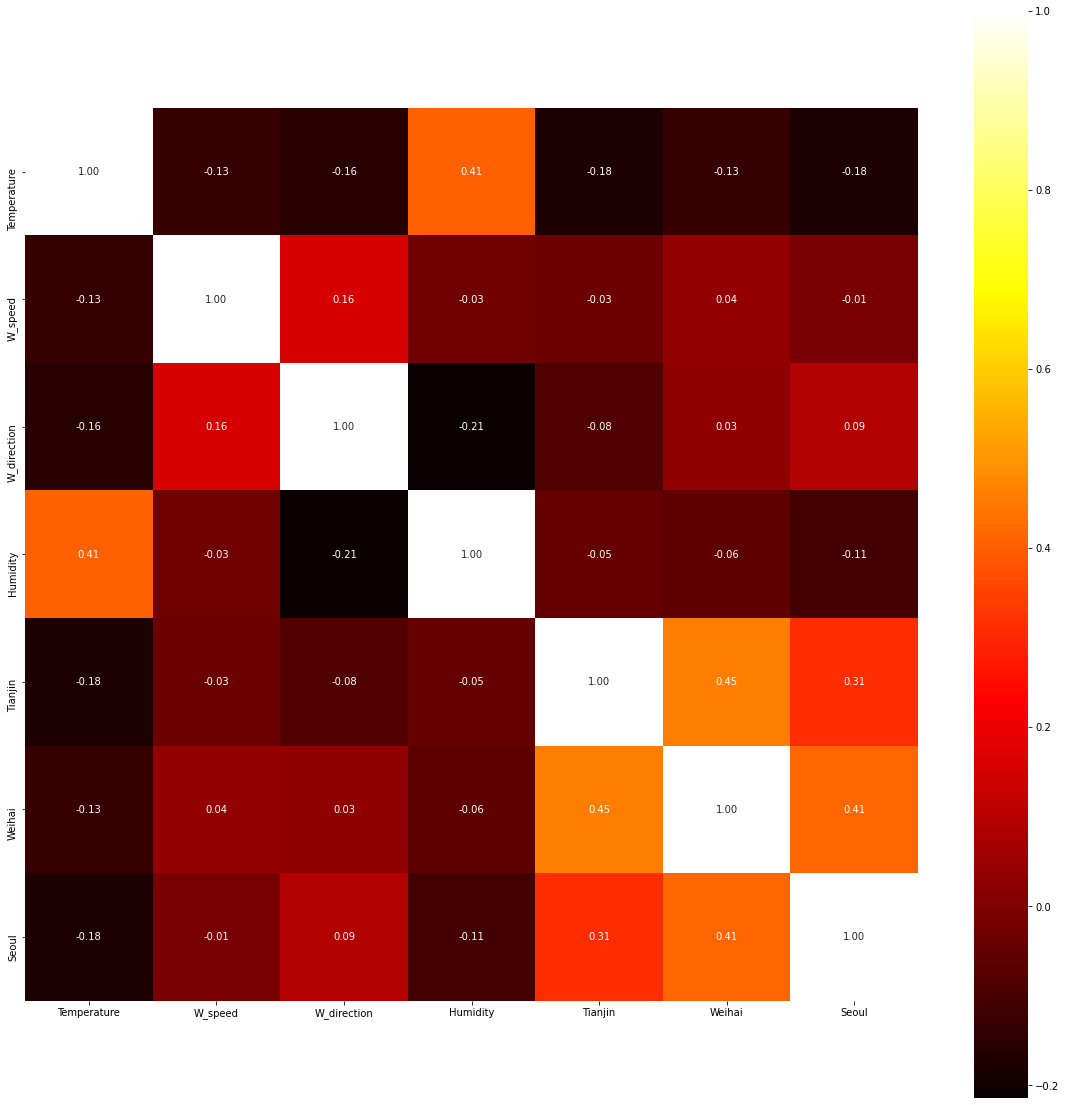

In [11]:
# 각 변수간의 관계를 한번에 출력하는 히트맵
plt.figure(figsize=(20, 20))
df_heatmap = sns.heatmap(corr, cbar=True, annot=True,
                        annot_kws={'size':10}, fmt = '.2f', square=True, cmap='hot')

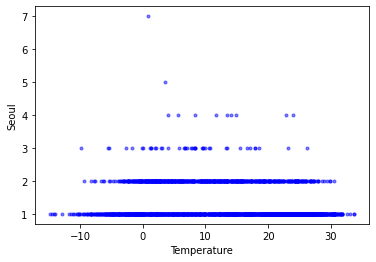

In [12]:
# 온도와 서울 미세먼지 관계 확인
plt.plot('Temperature', 'Seoul', data=train, linestyle='none', marker='o',
        markersize=3, color='blue', alpha=0.5)

plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Seoul', fontsize=10)

plt.show()

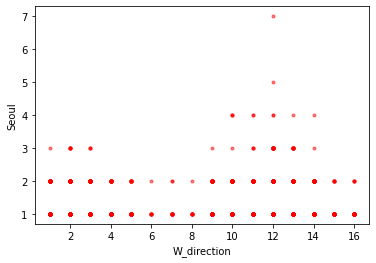

In [13]:
# 풍향와 서울 미세먼지 관계 확인
plt.plot('W_direction', 'Seoul', data=train, linestyle='none', marker='o',
        markersize=3, color='red', alpha=0.5)

plt.xlabel('W_direction', fontsize=10)
plt.ylabel('Seoul', fontsize=10)

plt.show()

In [14]:
from keras.models import Sequential # Sequential : layer를 선형으로 쌓음
from keras.layers import Dense, LSTM # Dense : 계산 수행 layer

In [15]:
# 서울 미세먼지 array로 변환
from numpy import array

Seoul = array(train['Seoul'])
Weihai = array(train['Weihai'])

In [16]:
# 난수 seed 생성
np.random.seed(777)

In [17]:
# LSTM의 입력에 대한 출력을 매핑하는 작업 시작
# 시계열 예측을 위한 다층 퍼셉트론 모델 함수
# 위에서 생성한 array를 샘플이라고 하는 여러 입력 / 출력의 패턴으로 분할
# 5개가 입력되고 그 다음 1개가 출력으로 사용되는 방식
steps = 5
features = 1

def split_sequence(sequence, steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_index = i + steps
        
        if end_index > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_index], sequence[end_index]
        X.append(seq_x)
        y.append(seq_y)
        
    return array(X), array(y)

In [18]:
# 각 array가 2557개에서 steps 수를 제외한 2552개의 array로 변함
x_Seoul, y_Seoul = split_sequence(Seoul, steps)
print(x_Seoul.shape, y_Seoul.shape)

(2552, 5) (2552,)


In [19]:
x_Weihai, y_Weihai = split_sequence(Weihai, steps)
print(x_Weihai.shape, y_Weihai.shape)

(2552, 5) (2552,)


In [20]:
x_Seoul

array([[3, 2, 2, 2, 1],
       [2, 2, 2, 1, 2],
       [2, 2, 1, 2, 2],
       ...,
       [2, 1, 2, 2, 2],
       [1, 2, 2, 2, 2],
       [2, 2, 2, 2, 1]], dtype=int64)

In [21]:
# reshape : 배열 재구조
x_Seoul = x_Seoul.reshape((x_Seoul.shape[0], x_Seoul.shape[1], features))
x_Weihai = x_Weihai.reshape((x_Weihai.shape[0], x_Weihai.shape[1], features))

In [22]:
# reshape를 통해 2차원 array로 변환된 것 확인
x_Seoul

array([[[3],
        [2],
        [2],
        [2],
        [1]],

       [[2],
        [2],
        [2],
        [1],
        [2]],

       [[2],
        [2],
        [1],
        [2],
        [2]],

       ...,

       [[2],
        [1],
        [2],
        [2],
        [2]],

       [[1],
        [2],
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        [2],
        [1]]], dtype=int64)

In [23]:
# model
model = Sequential()
model.add(LSTM(300, activation='relu', input_shape=(steps, features))) # relu함수 사용
model.add(Dense(1)) # 출력 layer가 1개

model.compile(optimizer='adam', loss='mse') # train과정 : adam, 손실함수 : mse(최소제곱오차)

histogram = model.fit(x_Seoul, y_Seoul, epochs=50, batch_size=100, verbose=1) # verbose : 진행과정 표시

Epoch 1/50
26/26 [==============================] - 1s 13ms/step - loss: 1.1378
Epoch 2/50
26/26 [==============================] - 0s 13ms/step - loss: 0.3009
Epoch 3/50
26/26 [==============================] - 0s 14ms/step - loss: 0.2392
Epoch 4/50
26/26 [==============================] - 0s 14ms/step - loss: 0.2318
Epoch 5/50
26/26 [==============================] - 0s 13ms/step - loss: 0.2002
Epoch 6/50
26/26 [==============================] - 0s 14ms/step - loss: 0.2175
Epoch 7/50
26/26 [==============================] - 0s 14ms/step - loss: 0.2273
Epoch 8/50
26/26 [==============================] - 0s 13ms/step - loss: 0.2082
Epoch 9/50
26/26 [==============================] - 0s 15ms/step - loss: 0.2166
Epoch 10/50
26/26 [==============================] - 0s 14ms/step - loss: 0.2213
Epoch 11/50
26/26 [==============================] - 0s 13ms/step - loss: 0.2106
Epoch 12/50
26/26 [==============================] - 0s 15ms/step - loss: 0.2215
Epoch 13/50
26/26 [==================

In [24]:
# test_dust.csv
test = pd.read_csv('test_dust.csv')

In [25]:
test.head()

,Date,Temperature,W_speed,W_direction,Humidity,Tianjin,Weihai,Seoul
0,2021-01-01,-4.2,2.0,12.0,64.0,2.0,2.0,1.0
1,2021-01-02,-5.0,2.6,12.0,38.5,2.0,2.0,1.0
2,2021-01-03,-5.6,2.0,12.0,45.0,2.0,2.0,1.0
3,2021-01-04,-3.5,1.7,2.0,51.4,1.0,2.0,1.0
4,2021-01-05,-5.5,2.9,13.0,52.8,1.0,1.0,1.0


In [26]:
# test의 서울 미세먼지를 array로 생성
test_Seoul = array(test['Seoul'])
x_test, y_test = split_sequence(test_Seoul, steps)

In [29]:
test.shape

(2738, 8)